<h1><strong style="color:purple">Nome:</strong> Rafael Aranda Martins</h1>
<h6><strong style="color:purple">Video Game Sales with Ratings:</strong> https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings</h6>

In [1]:
# IMPORTAÇÕES NECESSÁRIAS

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
# IMPORTANDO A BASE DE DADOS

games = pd.read_csv('Video_Games_Sales.csv')

In [3]:
# VERIFICANDO

games.shape

(16719, 16)

In [4]:
# O SEU HEADER

games.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [5]:
# O SEU FOOTER

games.tail()

Name Platform  Year_of_Release       Genre  \
16714  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16715               LMA Manager 2007     X360           2006.0      Sports   
16716        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16717               Spirits & Spells      GBA           2003.0    Platform   
16718            Winning Post 8 2016      PSV           2016.0  Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
16714    Tecmo Koei      0.00      0.00      0.01          0.0          0.01   
16715   Codemasters      0.00      0.01      0.00          0.0          0.01   
16716  Idea Factory      0.00      0.00      0.01          0.0          0.01   
16717       Wanadoo      0.01      0.00      0.00          0.0          0.01   
16718    Tecmo Koei      0.00      0.00      0.01          0.0          0.01   

       Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
16714           NaN           NaN        NaN         NaN       NaN    NaN  
16715           NaN           NaN        NaN         NaN       NaN    NaN  
16716           NaN           NaN        NaN         NaN       NaN    NaN  
16717           NaN           NaN        NaN         NaN       NaN    NaN  
16718           NaN           NaN        NaN         NaN       NaN    NaN

In [6]:
# 5 AMOSTRAS ALEATÓRIAS

games.sample(5)

Name Platform  Year_of_Release     Genre  \
13534             Tropico 3       PC           2009.0  Strategy   
13851          Sacred Blaze      PS2           2009.0  Strategy   
7902   Tamagotchi Party On!      Wii           2006.0      Misc   
1441         SingStar Party      PS2           2004.0      Misc   
2828                Area 51       PS           1996.0   Shooter   

                         Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
13534                Kalypso Media      0.00      0.04      0.00         0.01   
13851                  Flight-Plan      0.00      0.00      0.04         0.00   
7902            Namco Bandai Games      0.12      0.00      0.06         0.01   
1441   Sony Computer Entertainment      0.00      1.04      0.00         0.31   
2828                GT Interactive      0.40      0.27      0.00         0.05   

       Global_Sales  Critic_Score  Critic_Count User_Score  User_Count  \
13534          0.04          79.0          48.0        8.1       184.0   
13851          0.04           NaN           NaN        NaN         NaN   
7902           0.19           NaN           NaN        NaN         NaN   
1441           1.35           NaN           NaN        NaN         NaN   
2828           0.72           NaN           NaN        NaN         NaN   

       Developer Rating  
13534  Haemimont      T  
13851        NaN    NaN  
7902         NaN    NaN  
1441         NaN    NaN  
2828         NaN    NaN

In [7]:
# AS INFORMAÇÕES DE TIPAGEM DA MESMA

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


<h1><strong style="color:purple">PARTE 01:</strong> Análises Descritivas</h1>

In [8]:
# QUAIS AS 10 DESENVOLVEDORAS COM MAIS LANÇAMENTOS?

gamesDesenvolvedora = games.groupby(by='Developer').size()
gamesDesenvolvedora = gamesDesenvolvedora.sort_values(ascending=False)
gamesDesenvolvedora.head(10)

Developer
Ubisoft             204
EA Sports           172
EA Canada           167
Konami              162
Capcom              139
EA Tiburon          108
Electronic Arts     104
Ubisoft Montreal    101
Visual Concepts      99
Omega Force          80
dtype: int64

In [9]:
# QUAIS AS 10 PLATAFORMAS QUE MAIS POSSUEM GAMES?

gamesPlataforma = games.groupby(by='Platform').size()
gamesPlataforma = gamesPlataforma.sort_values(ascending=False)
gamesPlataforma.head(10)

Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
dtype: int64

In [10]:
# QUAIS OS 10 ANOS QUE MAIS POSSUEM LANÇAMENTOS?

gamesAnoLancamento = games.groupby(by='Year_of_Release').size()
gamesAnoLancamento = gamesAnoLancamento.sort_values(ascending=False)
gamesAnoLancamento.head(10)

Year_of_Release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
dtype: int64

In [11]:
# QUAS OS 10 GÊNEROS COM MAIS GAMES?

gamesGenero = games.groupby(by='Genre').size()
gamesGenero = gamesGenero.sort_values(ascending=False)
gamesGenero.head(10)

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
dtype: int64

In [12]:
# TOP 10 DOS GAMES MAIS VENDIDOS GLOBALMENTE:

games['Global_Sales'] = games['Global_Sales'].astype('float64')
gamesDecrescente = games.sort_values(by='Global_Sales', ascending=False)
gamesDecrescente = gamesDecrescente.drop(columns=['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'])
gamesDecrescente.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         40.24   
2  Nintendo     15.68     12.76      3.79         3.29         35.52   
3  Nintendo     15.61     10.93      3.28         2.95         32.77   
4  Nintendo     11.27      8.89     10.22         1.00         31.37   
5  Nintendo     23.20      2.26      4.22         0.58         30.26   
6  Nintendo     11.28      9.14      6.50         2.88         29.80   
7  Nintendo     13.96      9.18      2.93         2.84         28.92   
8  Nintendo     14.44      6.94      4.70         2.24         28.32   
9  Nintendo     26.93      0.63      0.28         0.47         28.31   

  Developer Rating  
0  Nintendo      E  
1       NaN    NaN  
2  Nintendo      E  
3  Nintendo      E  
4       NaN    NaN  
5       NaN    NaN  
6  Nintendo      E  
7  Nintendo      E  
8  Nintendo      E  
9       NaN    NaN

In [13]:
# TOP 10 DOS GAMES MAIS ADORADOS PELA CRÍTICA:

games['Critic_Score'] = games['Critic_Score'].astype('float64')
gamesCritica = games.sort_values(by='Critic_Score', ascending=False)
gamesCritica = gamesCritica.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Count', 'User_Count'])
gamesCritica.head(10)

Name Platform  Year_of_Release     Genre  \
227   Tony Hawk's Pro Skater 2       PS           2000.0    Sports   
57         Grand Theft Auto IV      PS3           2008.0    Action   
51         Grand Theft Auto IV     X360           2008.0    Action   
5350               SoulCalibur       DC           1999.0  Fighting   
165         Grand Theft Auto V     XOne           2014.0    Action   
23          Grand Theft Auto V     X360           2013.0    Action   
1877                   NFL 2K1       DC           2000.0    Sports   
42          Grand Theft Auto V      PS4           2014.0    Action   
129       Halo: Combat Evolved       XB           2001.0   Shooter   
49          Super Mario Galaxy      Wii           2007.0  Platform   

                   Publisher  Critic_Score User_Score  \
227               Activision          98.0        7.7   
57      Take-Two Interactive          98.0        7.5   
51      Take-Two Interactive          98.0        7.9   
5350      Namco Bandai Games          98.0        8.8   
165     Take-Two Interactive          97.0        7.9   
23      Take-Two Interactive          97.0        8.1   
1877                    Sega          97.0          6   
42      Take-Two Interactive          97.0        8.3   
129   Microsoft Game Studios          97.0        8.6   
49                  Nintendo          97.0        8.9   

                    Developer Rating  
227   Neversoft Entertainment      T  
57             Rockstar North      M  
51             Rockstar North      M  
5350                    Namco      T  
165            Rockstar North      M  
23             Rockstar North      M  
1877          Visual Concepts      E  
42             Rockstar North      M  
129           Bungie Software      M  
49                   Nintendo      E

<h1><strong style="color:purple">PARTE 02:</strong> Plotagem de Dados</h1>

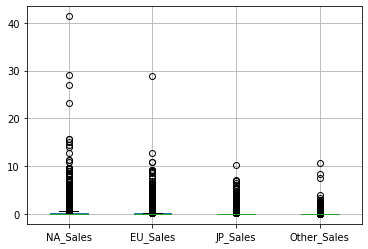

In [14]:
# QUANTIDADE DE VENDAS POR PAÍSES:

games.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.show()

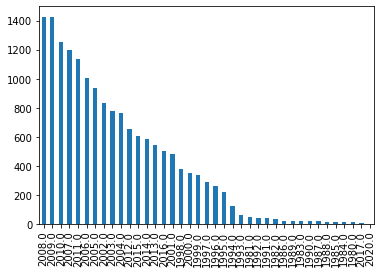

In [15]:
# ANOS E QUANTIDADES DE LANÇAMENTOS:

games['Year_of_Release'].value_counts().plot.bar()

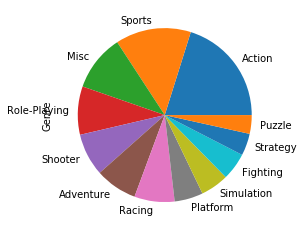

In [16]:
# GÊNEROS E SUAS QUANTIDADES:

games['Genre'].value_counts().plot.pie()

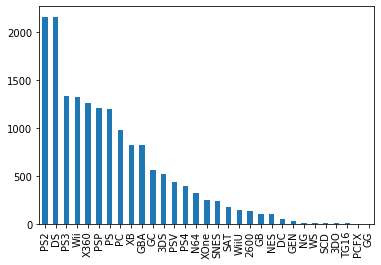

In [17]:
# PlATAFORMAS E QUANTIDADES DE LANÇAMENTO:

games['Platform'].value_counts().plot.bar()

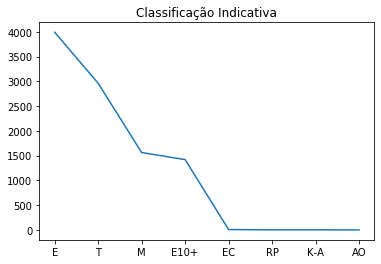

In [18]:
# CLASSIFICAÇÃO INDICATIVA E QUANTIDADE DESTES GAMES

r = games['Rating'].value_counts()

plt.plot( r )
plt.title("Classificação Indicativa")
plt.show()

In [19]:
# ESSA CLASSIFICAÇÃO INDICATIVA ACIMA É REFERENTE A (PADRÃO DA ESRB):

# E = [EVERIONE]
# T = [TEEN]
# M = [MATURE 17+]
# E10+ = [EVERIONE 10+]
# EC = [EARLY CHILDHOOD]
# RP = [RATING PENDING]
# K-A= [KIDS TO ADULTS]
# AO = [ADULTS ONLY 18+]

<h1><strong style="color:purple">PARTE 03:</strong> Análise Preditiva</h1>

<h6><strong style="color:purple">Objetivo da aprendizagem (finalidade):</strong> VERIFICAR A PLATAFORMA (OU CONSOLE) QUE AQUELE DETERMINADO JOGO FOI LANÇADO BASEANDO-SE APENAS NOS SEUS NÚMEROS DE VENDAS GLOBALMENTE</h6>

<h6><strong style="color:purple">Categoria (supervisionada, não supervisionada, por reforço):</strong> SUPERVISIONADA</h6>

<h6><strong style="color:purple">Problema (classificação, regressão, agrupamento, entre outros):</strong> CLASSIFICAÇÃO</h6>

<h6><strong style="color:purple">Shape do dataframe:</strong> (16719, 16) ONDE O SHAPE DO X FICOU = (16719, 5) E O SHAPE FINAL DO Y FICOU = (16719,)</h6>

<h6><strong style="color:purple">% treino e seu shape:</strong> 70% PARA O TREINO</h6>

<h6><strong style="color:purple">% teste e seu shape:</strong> 30% PARA O TESTE</h6>

<h6><strong style="color:purple">Nome do algoritmo estimador definido para o modelo:</strong> ExtraTreesClassifier (SEGUI O MODELO DO VÍDEO)</h6>

<h6><strong style="color:purple">Acurácia do treino:</strong> 46.49 (EU TINHA CONSEGUI UMA ACURÁCIA DE 98, QUANDO TERMINEI QUE PERCEBI QUE SÓ FICAVA ABAIXO DE 50)</h6>

<h6><strong style="color:purple">Resultados obtidos pela previsão:</strong> MESMO COM UMA ACURÁCIA TÃO BAIXA, COM UMA AMOSTRA DE 3, ACERTOU 2 E ERROU 1</h6>

In [20]:
# RETIRADAS ALGUMAS COLUNAS COM A TIPAGEM OBJECT E VERIFICADO 10 ELEMENTOS DO SEU HEADER

gamesAnalisePreditiva = games.drop(columns=['Name', 'Publisher', 'User_Score', 'User_Count', 'Developer', 'Rating', 'Critic_Score', 'Critic_Count'])
gamesAnalisePreditiva.head(10)

Platform  Year_of_Release         Genre  NA_Sales  EU_Sales  JP_Sales  \
0      Wii           2006.0        Sports     41.36     28.96      3.77   
1      NES           1985.0      Platform     29.08      3.58      6.81   
2      Wii           2008.0        Racing     15.68     12.76      3.79   
3      Wii           2009.0        Sports     15.61     10.93      3.28   
4       GB           1996.0  Role-Playing     11.27      8.89     10.22   
5       GB           1989.0        Puzzle     23.20      2.26      4.22   
6       DS           2006.0      Platform     11.28      9.14      6.50   
7      Wii           2006.0          Misc     13.96      9.18      2.93   
8      Wii           2009.0      Platform     14.44      6.94      4.70   
9      NES           1984.0       Shooter     26.93      0.63      0.28   

   Other_Sales  Global_Sales  
0         8.45         82.53  
1         0.77         40.24  
2         3.29         35.52  
3         2.95         32.77  
4         1.00         31.37  
5         0.58         30.26  
6         2.88         29.80  
7         2.84         28.92  
8         2.24         28.32  
9         0.47         28.31

In [21]:
# VERIFICANDO AS TIPAGEM DESSA PARTE QUE SERÁ UTILIZADA PARA PREDIÇÃO

gamesAnalisePreditiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16719 non-null  object 
 1   Year_of_Release  16450 non-null  float64
 2   Genre            16717 non-null  object 
 3   NA_Sales         16719 non-null  float64
 4   EU_Sales         16719 non-null  float64
 5   JP_Sales         16719 non-null  float64
 6   Other_Sales      16719 non-null  float64
 7   Global_Sales     16719 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.0+ MB


In [22]:
# JUNTANDO OS GÊNEROS POSSIVEIS NA BASE

gamesAnalisePreditiva.groupby(by='Genre').size()

Genre
Action          3370
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1500
Shooter         1323
Simulation       874
Sports          2348
Strategy         683
dtype: int64

In [23]:
# PASSANDO ESSES GÊNEROS PARA UMA LÓGICA NUMÉRICA

gamesAnalisePreditiva['Genre'] = gamesAnalisePreditiva['Genre'].replace('Action', 1)
gamesAnalisePreditiva['Genre'] = gamesAnalisePreditiva['Genre'].replace('Adventure', 2)
gamesAnalisePreditiva['Genre'] = gamesAnalisePreditiva['Genre'].replace('Fighting', 3)
gamesAnalisePreditiva['Genre'] = gamesAnalisePreditiva['Genre'].replace('Misc', 4)
gamesAnalisePreditiva['Genre'] = gamesAnalisePreditiva['Genre'].replace('Platform', 5)
gamesAnalisePreditiva['Genre'] = gamesAnalisePreditiva['Genre'].replace('Puzzle', 6)
gamesAnalisePreditiva['Genre'] = gamesAnalisePreditiva['Genre'].replace('Racing', 7)
gamesAnalisePreditiva['Genre'] = gamesAnalisePreditiva['Genre'].replace('Role-Playing', 8)
gamesAnalisePreditiva['Genre'] = gamesAnalisePreditiva['Genre'].replace('Shooter', 9)
gamesAnalisePreditiva['Genre'] = gamesAnalisePreditiva['Genre'].replace('Simulation', 10)
gamesAnalisePreditiva['Genre'] = gamesAnalisePreditiva['Genre'].replace('Sports', 11)
gamesAnalisePreditiva['Genre'] = gamesAnalisePreditiva['Genre'].replace('Strategy', 1)

In [24]:
# PEQUENO SAMPLE PARA VERIFICAÇÃO

gamesAnalisePreditiva.sample(10)

Platform  Year_of_Release  Genre  NA_Sales  EU_Sales  JP_Sales  \
3351        DS           2007.0    1.0      0.28      0.25      0.00   
10944       PS           2001.0    8.0      0.00      0.00      0.09   
13613       DS           2008.0    2.0      0.00      0.00      0.04   
13810      PSP           2011.0    8.0      0.00      0.00      0.04   
3229        GC           2006.0   11.0      0.48      0.13      0.00   
7726       PS2           2005.0    9.0      0.10      0.07      0.00   
10840      PS2           2006.0    1.0      0.05      0.04      0.00   
5986      X360           2010.0    8.0      0.13      0.10      0.04   
6424      X360           2010.0    1.0      0.24      0.00      0.00   
9004       Wii           2007.0    1.0      0.13      0.00      0.00   

       Other_Sales  Global_Sales  
3351          0.06          0.60  
10944         0.01          0.09  
13613         0.00          0.04  
13810         0.00          0.04  
3229          0.02          0.62  
7726          0.02          0.19  
10840         0.01          0.09  
5986          0.02          0.29  
6424          0.02          0.26  
9004          0.01          0.14

In [25]:
# VERIFICANDO A OUTRA LISTA DE STRINGS

gamesAnalisePreditiva.groupby(by='Platform').size()

Platform
2600     133
3DO        3
3DS      520
DC        52
DS      2152
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      393
PSP     1209
PSV      432
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
dtype: int64

In [26]:
# APLICANDO A LÓGICA NUMÉRICA MANUAL PARA TRANSFORMAÇÃO DA TIPAGEM

gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('2600', 1)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('3DO', 2)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('3DS', 3)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('DC', 4)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('DS', 5)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('GB', 6)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('GBA', 7)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('GC', 8)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('GEN', 9)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('GG', 10)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('N64', 11)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('NES', 12)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('NG', 13)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('PC', 14)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('PCFX', 15)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('PS', 16)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('PS2', 17)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('PS3', 18)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('PS4', 19)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('PSP', 20)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('PSV', 21)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('SAT', 22)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('SCD', 23)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('SNES', 24)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('TG16', 25)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('WS', 26)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('Wii', 27)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('WiiU', 28)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('X360', 29)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('XB', 30)
gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].replace('XOne', 31)

In [27]:
# SAMPLEZINHO SÓ PARA GARANTIR

gamesAnalisePreditiva.sample(10)

Platform  Year_of_Release  Genre  NA_Sales  EU_Sales  JP_Sales  \
9128         16           1997.0    7.0      0.08      0.05      0.00   
465          29           2008.0    1.0      1.94      0.79      0.02   
7447         21           2014.0    3.0      0.00      0.03      0.17   
856          16           1997.0    1.0      0.95      0.64      0.27   
5889          8              NaN   11.0      0.23      0.06      0.00   
7017         18           2008.0    1.0      0.12      0.08      0.00   
14538        16           2001.0    1.0      0.02      0.01      0.00   
10200        11           1999.0    7.0      0.09      0.02      0.00   
590          17           2004.0   11.0      2.03      0.21      0.00   
4520         18           2012.0    4.0      0.26      0.11      0.00   

       Other_Sales  Global_Sales  
9128          0.01          0.14  
465           0.28          3.03  
7447          0.01          0.21  
856           0.13          1.99  
5889          0.01          0.30  
7017          0.03          0.23  
14538         0.00          0.03  
10200         0.00          0.11  
590           0.35          2.59  
4520          0.06          0.43

In [28]:
# VERIFICAR A TIPAGEM NOVAMENTE

gamesAnalisePreditiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16719 non-null  int64  
 1   Year_of_Release  16450 non-null  float64
 2   Genre            16717 non-null  float64
 3   NA_Sales         16719 non-null  float64
 4   EU_Sales         16719 non-null  float64
 5   JP_Sales         16719 non-null  float64
 6   Other_Sales      16719 non-null  float64
 7   Global_Sales     16719 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.0 MB


In [29]:
# NO FINAL (PARTE 4) EU CONTO O PORQUE FIZ ESSA CONVERSÃO DOS TIPOS

gamesAnalisePreditiva['Platform'] = gamesAnalisePreditiva['Platform'].astype('float32')
gamesAnalisePreditiva['Year_of_Release'] = gamesAnalisePreditiva['Year_of_Release'].astype('float32')
gamesAnalisePreditiva['Genre'] = gamesAnalisePreditiva['Genre'].astype('float32')
gamesAnalisePreditiva['NA_Sales'] = gamesAnalisePreditiva['NA_Sales'].astype('float32')
gamesAnalisePreditiva['EU_Sales'] = gamesAnalisePreditiva['EU_Sales'].astype('float32')
gamesAnalisePreditiva['JP_Sales'] = gamesAnalisePreditiva['JP_Sales'].astype('float32')
gamesAnalisePreditiva['Other_Sales'] = gamesAnalisePreditiva['Other_Sales'].astype('float32')
gamesAnalisePreditiva['Global_Sales'] = gamesAnalisePreditiva['Global_Sales'].astype('float32')

In [30]:
# TUDO PADRONIZADO

gamesAnalisePreditiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16719 non-null  float32
 1   Year_of_Release  16450 non-null  float32
 2   Genre            16717 non-null  float32
 3   NA_Sales         16719 non-null  float32
 4   EU_Sales         16719 non-null  float32
 5   JP_Sales         16719 non-null  float32
 6   Other_Sales      16719 non-null  float32
 7   Global_Sales     16719 non-null  float32
dtypes: float32(8)
memory usage: 522.6 KB


In [31]:
# SEPAREI A MINHA BASE EM 2 PARTES

y = gamesAnalisePreditiva['Platform']
x = gamesAnalisePreditiva.drop(columns=['Year_of_Release', 'Genre', 'Platform'])

In [32]:
# VERIFICANDO O Y (PLATAFORMAS OU CONSOLES)

y

0        27.0
1        12.0
2        27.0
3        27.0
4         6.0
         ... 
16714    18.0
16715    29.0
16716    21.0
16717     7.0
16718    21.0
Name: Platform, Length: 16719, dtype: float32

In [33]:
# VERIFICANDO O X (APENAS DADOS DE NÚMEROS VENDIDOS)

x

NA_Sales   EU_Sales  JP_Sales  Other_Sales  Global_Sales
0      41.360001  28.959999      3.77         8.45     82.529999
1      29.080000   3.580000      6.81         0.77     40.240002
2      15.680000  12.760000      3.79         3.29     35.520000
3      15.610000  10.930000      3.28         2.95     32.770000
4      11.270000   8.890000     10.22         1.00     31.370001
...          ...        ...       ...          ...           ...
16714   0.000000   0.000000      0.01         0.00      0.010000
16715   0.000000   0.010000      0.00         0.00      0.010000
16716   0.000000   0.000000      0.01         0.00      0.010000
16717   0.010000   0.000000      0.00         0.00      0.010000
16718   0.000000   0.000000      0.01         0.00      0.010000

[16719 rows x 5 columns]

In [34]:
# SHAPE FINAL DO X

x.shape

(16719, 5)

In [35]:
# SHAPE FINAL DO Y

y.shape

(16719,)

In [36]:
# SEPARAR OS DADOS NAS VARIÁVEIS ABAIXO

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

In [37]:
# VERIFICAR COMO FICOU O X TREINO

x_treino.shape

(11703, 5)

In [38]:
# EM COMPARAÇÃO COM O X TESTE

x_teste.shape

(5016, 5)

In [39]:
# EU EXPLICO MELHOR NA PARTE 4, MAS AQUI REMOVI MAIS COLUNAS POIS CONTINHAM NAN, 
# O RESULTADO FINAL SÃO ESSAS COLUNAS:

print(x.isna().sum())

NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [40]:
# RODANDO A PREDIÇÃO, PARA REALIZAR O APRENDIZADO E OBTER A QUANTIDADE DE ACURÁCIA

modelo = ExtraTreesClassifier()
resultadoTreino = modelo.fit(x_treino, y_treino)
resultadoTeste = modelo.score(x_teste, y_teste)
print(f'Acurácia Teste {resultadoTeste*100:.2f} | Acurácia Treino {resultadoTeste*100:.2f}')

Acurácia Teste 46.49 | Acurácia Treino 46.49


In [41]:
# SERÁ VERIFICADO O SEGUINTE INTERVALO

x_teste[1114:1117]

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
5011       0.07      0.05      0.25         0.02          0.38
9054       0.13      0.00      0.00         0.01          0.14
10542      0.00      0.00      0.10         0.00          0.10

In [42]:
# PREVIEW NESSE INTERVALO

preview = modelo.predict(x_teste[1114:1117])

In [43]:
# VERIFICAR A OPINIÃO DO CÓDIGO QUANTO DO PREVIEW ACIMA

preview

array([17.,  5.,  5.], dtype=float32)

In [44]:
# VERIFICAR OS VALORES REALMENTES CERTOS

y_teste[1114:1117]

5011     17.0
9054      5.0
10542    18.0
Name: Platform, dtype: float32

<h1><strong style="color:purple">PARTE 04:</strong> INVESTIGAÇÃO DE CÓDIGO E RELATO DE ERRO</h1>

UM DOS PROBLEMAS QUE TIVE COM O DESENVOLVIMENTO,

E O MOTIVO POR TER TIRADO A MAIS AS COLUNAS <code>"Genre"</code> E <code>"Year_of_Release"</code>

SEGUINDO A IDEIA DO VIDEO, SEPAREI MINHA BASE:

<code>y = gamesAnalisePreditiva['Platform']</code> e 
<code>x = gamesAnalisePreditiva.drop('Platform', axis=1)</code>


A SAÍDA SEGUINTE DE Y:
<img src="Screenshot_59.png">


A SAÍDA SEGUINTE DE X:
<img src="Screenshot_60.png">


ACARRETAVA NO ERRO ABAIXO:
<img src="Screenshot_62.png">


MAS OS TIPOS ESTAVAM CERTOS, AQUI EU JÁ TINHA MUDADO PARA O FORMATO <code>float32</code> PARA TENTAR SOLUCIONAR

POIS ANTES ESTAVAM TODOS <code>float64</code> E MESMO ASSIM GERAVA ERRO PEDINDO PARA SER O <code>float32</code>

<img src="Screenshot_61.png">


NÃO ERAM OS FLOATS, MUDEI PARA OS 32 E NADA...

SEGUI O OUTRO PASSO DO ERRO,

VERIFIQUEI QUANTO AOS NAN, PORQUE NÚMEROS COM ZERO EU SABIA QUE TINHA

AI QUE EU ACHEI A CAUSA DO PROBLEMA:
<img src="Screenshot_63.png">


ENTÃO RESOLVI TIRAR ESSAS COLUNAS QUE POSSUIAM NAN (MESMO SENDO IMPORTANTES PARA O RESULTADO FINAL)

MAS AQUI PARECE FÁCIL E RÁPIDO, MAS DEMOROU, EU TENTEI TIRAR SÓ AS LINHAS COM NAN E NÃO DAVA, AI PENSEI MAIS LÓGICAMENTE

E TIREI AS COLUNAS COM NAN,

E DAÍ TUDO FUNCIONOU COMO TINHA QUE SER